#### 1.문제 정의 
- 광고비용으로 매출을 예측 
- 지도학습 /회귀

#### 2.데이터 수집

In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('Advertising.csv',index_col=0)

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### 데이터 전처리

In [5]:
X=data.iloc[:,:3]
y=data.iloc[:,3]

In [6]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 3 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
dtypes: float64(3)
memory usage: 6.2 KB


In [8]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [9]:
y.shape

(200,)

#### 4.EDA

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

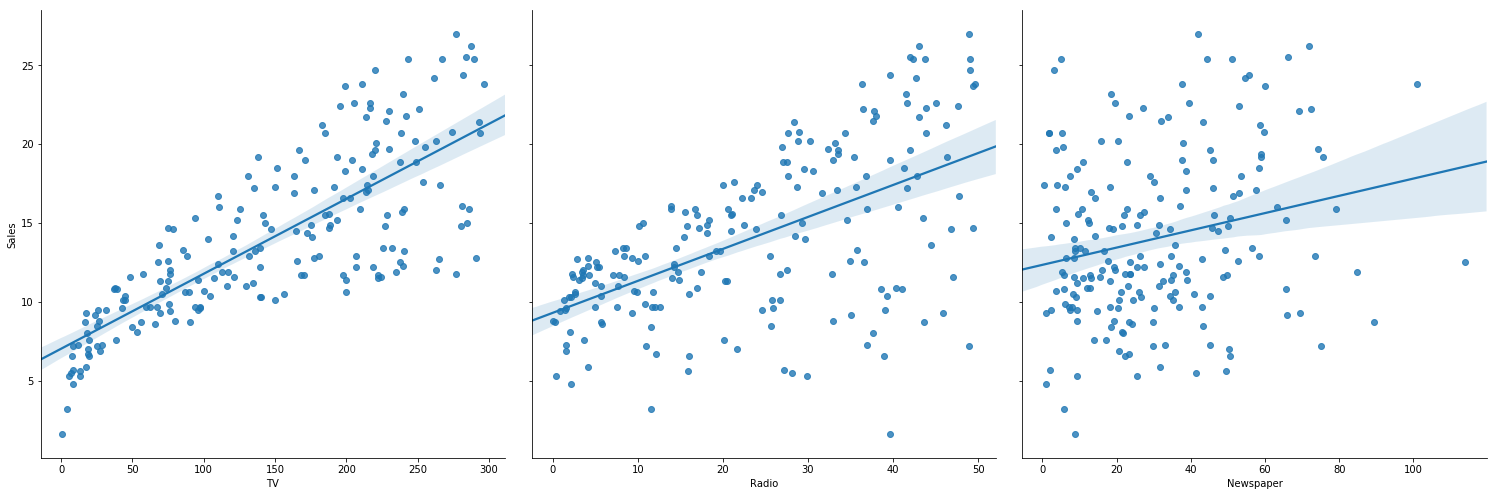

In [13]:
sb.pairplot(data, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,kind="reg")

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
# y= w1*x1 + w2*x2 + w3*x3 + b

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print("계수:{}".format(lr.coef_))

계수:[0.04391531 0.20027962 0.00184368]


In [21]:
print("절편:{}".format(lr.intercept_))

절편:2.880255286331325


In [22]:
# y= 0.043*TV + 0.2*Radio + 0.01*Newspaper + 2.88

In [23]:
print("훈련점수:{}".format(lr.score(X_train,y_train)))
print("테스트점수:{}".format(lr.score(X_test,y_test)))

훈련점수:0.9065727532450597
테스트점수:0.8649018906637793


#### RMSE 
- mse에 루트를 씌운값 

#### mse
- 실제값과 예측값의 차이를 제곱해 편균한것 

In [24]:
y_pred =lr.predict(X_test)

In [25]:
import numpy as np
from sklearn import metrics

In [26]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.921300300759516

In [27]:
feature=['TV','Radio']

In [28]:
X=data[feature]

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print("훈련점수:{}".format(lr.score(X_train,y_train)))
print("테스트점수:{}".format(lr.score(X_test,y_test)))

훈련점수:0.9065235649327258
테스트점수:0.8656552691810044


In [33]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.921300300759516